In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    })

--------------------------------

# Results


### PINN: 

Network: [1, 200, 200, 200, 200, 101]

Num Param: 141.30k

Error u: 5.043998e-03


### QRes-PINN: 
Network: [1, 50, 50, 50, 50, 101]

Num Param: 25.50k

Error u: 3.576741e-03

Percentage Improvement: 29.0892%



## Count Number of Parameters

In [2]:
l = [1, 200, 200, 200, 200, 101]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] + l[i+1]
print("PINN Num params: %.2fk" % np.round(num_param / 1000, 2))

PINN Num params: 141.30k


In [3]:
l = [1, 50, 50, 50, 50, 101]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes Num params: %.2fk" % np.round(num_param / 1000, 2))

QRes Num params: 25.50k



--------------------------------

# Training Loss


In [4]:
pinn = np.load("loss/loss_PINNs.npy")
qres = np.load("loss/loss_QRes.npy")
x = np.arange(0, 10000, 10)
x_pinn = np.concatenate((x, np.arange(len(pinn) - 1000) + 10000))
x_qres = np.concatenate((x, np.arange(len(qres) - 1000) + 10000))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


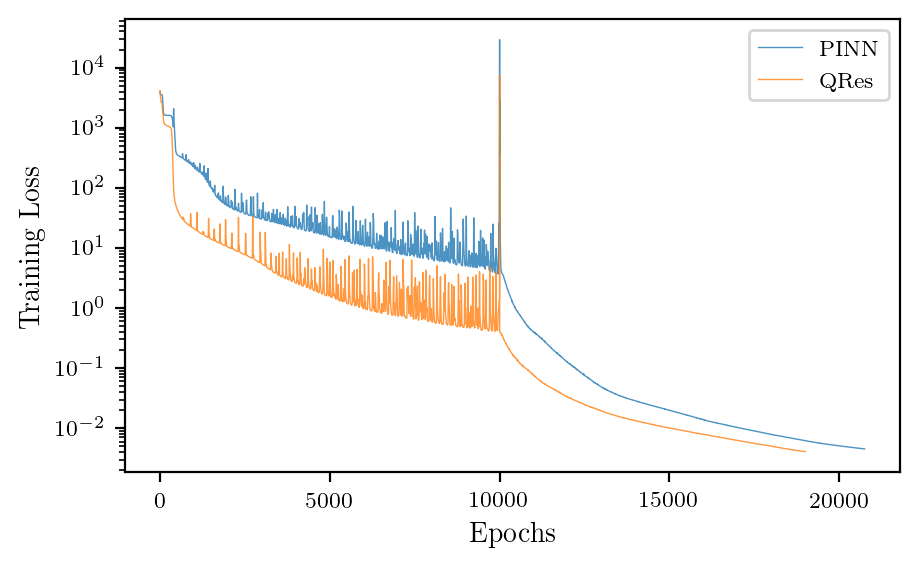

In [5]:
plt.figure(dpi=200, figsize=(5, 3))
plt.yscale('log')
sns.lineplot(x=x_pinn, y=pinn, label='PINN', lw=0.5, alpha=0.8)
sns.lineplot(x=x_qres, y=qres, label='QRes', lw=0.5, alpha=0.8)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()